## DEL-01 Programming Excercise - Logistic Regression and Vectorization
### (created by Prof. Dr.-Ing. Christian Bergler & Prof. Dr. Fabian Brunner)

Documentation: **Python-Bibliothek Pandas** - https://pandas.pydata.org/docs/

Documentation: **Numpy** - https://numpy.org/doc/

Documentation: **Sklearn** - https://scikit-learn.org/stable/index.html

Documentation: **Matplotlib** - Documentation: https://matplotlib.org/stable/index.html

Documentation: **Matplotlib** - Graphics Gallery: https://matplotlib.org/2.0.2/gallery.html

Additional Documentation: **Python Tutorial** - https://docs.python.org/3/tutorial/

Additional Documentation: **Matthes Eric, "Python crash course: A hands-on, project-based introduction to programming"**, ISBN: 978-1-59327-603-4, ©2023 no starch press  

In [49]:
import pandas as pd
import numpy as np

- In the following exercise, the first 100 samples of the `Iris Dataset` are used to train a logistic regression model
- Familiarize yourself with the data structure (`data` and `target`) to understand the code below: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
- Use the `sklearn` module to import and load the `Iris Dataset`
- Get the training data (`X_train`) and corresponding ground truth (target/label) data `Y_train` for the first 100 data samples

In [50]:
from sklearn import datasets

iris = datasets.load_iris()
X_train = iris.data[:100, :2]  
Y_train = iris.target[:100]

- Return the shape for `X_train`and `Y_train`, as well as for the entire `Iris Dataset` and its `Targets`

In [51]:
#TODO
print("Shape of the training data:", X_train.shape)
print("Shape of the respective ground truth label data:", Y_train.shape)
print("Shape of the entire Iris Dataset:", iris.data.shape)
print("Shape of the entire Iris Targets:", iris.target.shape)

Shape of the training data: (100, 2)
Shape of the respective ground truth label data: (100,)
Shape of the entire Iris Dataset: (150, 4)
Shape of the entire Iris Targets: (150,)


- The code above creates a binary classification problem with the two classes 0 and 1 in the `targets` - use the `numpy unique` function to verify and prove it! Please also visualize the entire `target` vector of the `Iris Dataset`. Are there by default two or more class indices?

In [52]:
#TODO
print("How many labels are within the target vector of Y_train:", np.unique(Y_train))
print("Number of labels within the entire Iris Dataset:", np.unique(iris.target))
print("Entire Iris Dataset target vector:", iris.target)

How many labels are within the target vector of Y_train: [0 1]
Number of labels within the entire Iris Dataset: [0 1 2]
Entire Iris Dataset target vector: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


- Implement the sigmoid function $\sigma(x)=\frac{1}{1+e^{-x}}$ in such a way that it can be applied to both `scalars` and `NumPy arrays`. In the latter case, the function should be applied to each entry of the array (`vectorization`!) and the result should be `output` as a `vector of the same dimension` (use `numpy.exp`) 

In [53]:
def sigmoid(x):
    #TODO
    return 1/(1+np.exp(-x))

- Verify whether the function `sigmoid(x)`works in case of `scalar` and `vector` inputs!

In [54]:
x_scalar = 2
x_vector = np.array([-2,-1,0,1,2])
#TODO
print("Output of the sigmoid function using a scalar input:", sigmoid(x_scalar))
print("Output of the sigmoid function using a vector input:", sigmoid(x_vector))

Output of the sigmoid function using a scalar input: 0.8807970779778823
Output of the sigmoid function using a vector input: [0.11920292 0.26894142 0.5        0.73105858 0.88079708]


- In order to train the logistic regression function, it is mandatory to find the gradient of the respective loss function
- Logistic Regression uses the (binary) Cross-Entropy-Loss, defined as follows:
$$L(\vec{\theta})= -\frac{1}{m}\sum_{i=1}^m y^{(i)}\log\left(\sigma(\vec{\theta}^T\vec{x}^{(i)})\right)+(1-y^{(i)})\log\left(1-\sigma(\vec{\theta}^T\vec{x}^{(i)})\right)~,$$
wobei $\vec{x}^{(i)}=(1,x_1^{(i)},\ldots,x_p^{(i)})^T\in\mathbb{R}^{p+1}$, $\vec{\theta}=(\theta_0,\ldots,\theta_p)^T\in\mathbb{R}^p$, $y^{(i)}\in\{0,1\}$. 

- The gradient of $L$ $=\nabla L(\vec{\theta})$ has already been calculated as shown in the exercise sheet on "Mathematical Foundations":

$$\nabla L(\vec{\theta})=\frac{1}{m}\sum_{i=1}^m\left(\sigma(\vec{\theta}^T\vec{x}^{(i)})-y^{(i)}\right)\vec{x}^{(i)}$$

- The vectorized form can also be created from the above representation (see lecture - `Training Parametric Models`) - its vectorized form looks as follows: 

$$\nabla L(\vec{\theta})=\frac{1}{m}X^T\left(\sigma(X\vec{\theta})-\vec{y}\right)$$
with: $$X=\left(\begin{array}{cccc}1&x_1^{(1)}&\ldots &x_p^{(1)}\\1&x_1^{(2)}&\ldots &x_p^{(2)}\\ \vdots &\vdots &\ddots &\vdots \\1&x_1^{(m)}&\ldots& x_p^{(m)} \end{array}\right)~\quad\text{und}\quad\vec{y}=\left(\begin{array}{c} y^{(1)}\\ y^{(2)}\\ \vdots \\ y^{(m)}\end{array}\right)~.$$

- Applying the function $\sigma$ to the vector $X\vec{\theta}$ is to be understood component by component (row after row)

- Complete the implementation of the following class for logistic regression. Carry out calculations in vectorised form if possible

In [55]:
class MyLogisticRegression:
    
    def __init__(self, max_iter = 100, lr = 1.0):
        self.max_iter = max_iter #max number of iterations regarding the gradient descent algorithm
        self.learning_rate = lr #learning rate for the gradient descent algorithm
        self.theta = None #parameter/weight vector to be determined using the gradient descent algorithm
       
    
    def cross_entropy_loss(self, X, y):
        """
        Evaluation of cross entropy loss function
        
        :param X: batch of training data of dimension n_samples x n_features
        :type X: numpy array
        :param y: target values corresponding to records in X 
        :type y: numpy array
        :return: value of cross entropy loss function
        :rtype: float
        """
        #TODO

        n_samples = X.shape[0]
        Xtilde = np.hstack((np.ones((X.shape[0], 1)), X))
        s = 0.0
        for i in range(n_samples):
            s += -1.0/n_samples*(y[i]*np.log(sigmoid(self.theta@Xtilde[i]))+(1-y[i])*np.log(1-sigmoid(self.theta@Xtilde[i])))
        return s
    
    
    def cross_entropy_loss_vec(self, X, y):
        """
        Evaluation of cross entropy loss function in vectorized form
        
        :param X: batch of training data of dimension n_samples x n_features
        :type X: numpy array
        :param y: target values corresponding to records in X 
        :type y: numpy array
        :return: value of cross entropy loss function
        :rtype: float
        """
        #TODO
        Xtilde = np.hstack((np.ones((X.shape[0], 1)), X))
        return -1.0/X.shape[0]*(y.T@np.log(sigmoid(Xtilde@self.theta))+((1-y).T)@np.log(1-sigmoid(Xtilde@self.theta)))
    
    def train(self, X, y):
        """
        Model training using gradient descent optimization algorithm
        
        :param X: batch of training data of dimension n_samples x n_features
        :type X: numpy array
        :param y: target values corresponding to records in X 
        :type y: numpy array
        :return: List containing the values of the loss function after each iteration of Gradient descent
        :rtype: list
        """
        #TODO
        n_samples = X.shape[0]
        n_features = X.shape[1]
        self.theta = np.zeros(n_features+1)
        
        Xtilde = np.hstack((np.ones((X.shape[0], 1)), X))
        
        loss_history = []
        for it in range(self.max_iter):         
            delta = 1.0/n_samples * self.learning_rate * Xtilde.T@(sigmoid(Xtilde@self.theta)-y)
            self.theta -= delta
            loss_history.append(self.cross_entropy_loss_vec(X, y))
        return loss_history

    def predict_proba(self, X):
        """
        Predict scores
        
        :param X: batch of data to be scored
        :type X: numpy array
        :return: predicted scores for the records in X
        :rtype: numpy array 
        """        
        #TODO
        Xtilde = np.hstack((np.ones((X.shape[0], 1)), X))
        return sigmoid(Xtilde@self.theta)
    
    def predict(self, X, threshold):
        """
        Predict classes using the threshold value for the scores
        
        :param X: batch of data to be scored
        :type X: numpy array
        :param threshold: decision criterion, where the prediction probability of the model needs to be >= threshold to assign the binary (true) class =1 
        :type threshold: float
        :return: predicted classes for the records in X
        :rtype: numpy array
        """ 
        #TODO
        return (self.predict_proba(X)>=threshold).astype(int)

- Call the constructor of the class `MyLogisticRegression` to create an object `my_log_regressor` and train the algorithm in connection with the training data of the `Iris Dataset` (see above)

In [56]:
#TODO
my_log_regressor = MyLogisticRegression()

- The `preprocessing` package of the `sklear` module holds a class `StandardScaler`in order to standardize features by substracting the mean and scaling to unit variance via $$z = \frac{x-\mu}{s}$$ with $\mu =$mean, $s=$stdv
- Call the `fit_transform` function of the `sc` object in order to build the standardized data corpus

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#TODO 
X_train_std = sc.fit_transform(X_train)

- Train the model by calling the `train` function of the `my_log_regressor` ojbect together with the standardized training data and respective labels

In [58]:
#TODO
loss_history = my_log_regressor.train(X_train_std, Y_train)

- Using `matplotlib` in order to plot and visualize the temporal development regarding the values of the loss function

Text(0.5, 1.0, 'Loss history during training')

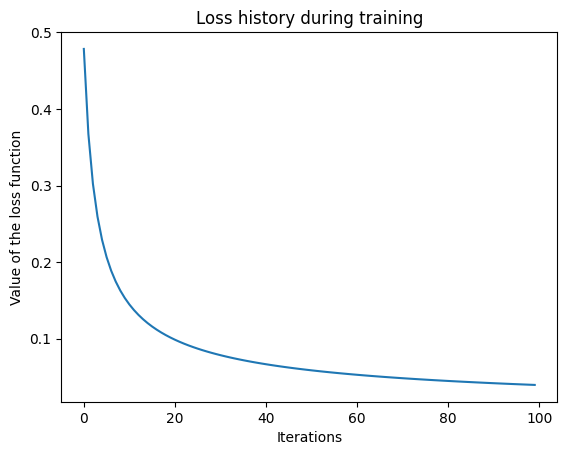

In [59]:
import matplotlib.pyplot as plt
#TODO
plt.plot(loss_history)

plt.xlabel("Iterations")
plt.ylabel("Value of the loss function")
plt.title("Loss history during training")

- Classification of the training dataset (Note: For the sake of simplicity, model validation by splitting the initial data corpus into training, validation, and test data paritions was not performed in this case. The aim of the task was primarily to introduce and present how to design a `logistic regression classifier`. In practice, of course, such partitioning is carried out in advance
- Call the `predict` function of the `my_log_regressor` object with respect to the standardized training data corpus, using a `threshold=0.5`
- What is the purpose of different thresholds and how they affect the outcome of the classification algorithm

In [60]:
#TODO
my_log_regressor.predict(X_train_std, 0.5)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

- **Remark:** To finally evaluate the model, the predicted labels can then be compared with the actual values to calculate the metrics - True Positive (TP), False Positive (FP), False Negative (FN) and True Negative - of the confusion matrix. From this, the target metrics such as Accuarcy, True Positive Rate, Precision, etc. can be derived.